<a href="https://colab.research.google.com/github/pavangajula98/ORES-5160-2023/blob/main/final/HDS_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HDS FINAL PROJECT-5210-2023**
## **"A Comprehensive Analysis of Cancer Trends and Geospatial Health Disparities"**

# Introduction:-
Cancer is a major public health issue nowadays. It comes in a variety of forms, each of which affects the body differently. However, all types of cancer can be dangerous and even fatal. The sickness is more than just a medical problem. It also has an impact on people's social lives, jobs, and overall well-being. Every year, many individuals die from cancer in the United States, demonstrating that it is a major health concern.

This research investigates cancer deaths by analyzing three main datasets.

1. The first dataset, named **"Leading Causes of Death in the United States from 1999 to 2017,"** was obtained in CSV format from Kaggle. It provides a wide overview of the country's leading causes of death, situating cancer within the framework of national health concerns.

---



2. The second dataset is the **"Compressed Mortality Dataset - Underlying Causes of Deaths in Missouri State,"** which was collected from the CDC WONDER website in CSV format. This dataset provides a thorough look at the individual causes of mortality in Missouri, emphasizing the impact of cancer on a more localized scale.

---



3. The final dataset, obtained in Excel format from Kaggle, covers the years 1980 to 2015 and focuses on **mortality at the county level across the United States.** This large dataset enables for a historical investigation of cancer death rates, revealing long-term trends and shifts over a 35-year period. These databases, when combined, constitute the basis of our analysis into the prevalence and trends of cancer mortality.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# **1.Leading Causes of Death in the United States from 1999 to 2017**

---



The first dataset examines the major causes of death in the United States from 1999 to 2017. It provides age-adjusted death rates to account for changes in the population's age structure over time, ensuring that the data is comparable between years. The rates are calculated per 100,000 individuals and are based on a typical 2000 U.S. population model. The data is compiled from death certificates submitted in all 50 states and the District of Columbia, providing a comprehensive picture of national health trends with a focus on cancer mortality. This information is essential for studying health outcomes and discovering long-term mortality trends.

**Link to the dataset:-**

https://www.kaggle.com/datasets/mattop/leading-causes-of-death-in-the-united-states/?select=causes-of-death.csv


In [2]:
# Load the first dataset in csv format from the local source
cause_death = pd.read_csv('/content/causes-of-death.csv')
cause_death.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8


In [3]:
cause_death.shape

(10868, 6)

In [4]:
# Check the datatypes of all the varaibles
cause_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     10868 non-null  int64  
 1   113 Cause Name           10868 non-null  object 
 2   Cause Name               10868 non-null  object 
 3   State                    10868 non-null  object 
 4   Deaths                   10868 non-null  int64  
 5   Age-adjusted Death Rate  10868 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 509.6+ KB


In [5]:
# Evaluate the presence of null values
cause_death.isna().sum()

Year                       0
113 Cause Name             0
Cause Name                 0
State                      0
Deaths                     0
Age-adjusted Death Rate    0
dtype: int64

In [6]:
# Get the different unique values in the varaible Cause Name
cause_death['Cause Name'].unique()

array(['Unintentional injuries', 'All causes', "Alzheimer's disease",
       'Stroke', 'CLRD', 'Diabetes', 'Heart disease',
       'Influenza and pneumonia', 'Suicide', 'Cancer', 'Kidney disease'],
      dtype=object)

In [7]:
# Group the data by 'Cause Name' and 'State', then sum the 'Deaths'
total_deaths_by_cause_state = cause_death.groupby(['Cause Name', 'State'])['Deaths'].sum().reset_index()

# Rename the columns for clarity
total_deaths_by_cause_state.columns = ['Cause Name', 'State', 'Total Deaths']

# View the DataFrame
total_deaths_by_cause_state

,Cause Name,State,Total Deaths
0,All causes,Alabama,914067
1,All causes,Alaska,67789
2,All causes,Arizona,895865
3,All causes,Arkansas,555553
4,All causes,California,4575252
...,...,...,...
567,Unintentional injuries,Virginia,53886
568,Unintentional injuries,Washington,49869
569,Unintentional injuries,West Virginia,22997
570,Unintentional injuries,Wisconsin,50243


In [49]:
# Get the total no. of cancer deaths for each state
cancer_deaths = total_deaths_by_cause_state[total_deaths_by_cause_state['Cause Name'] == 'Cancer']
cancer_deaths = cancer_deaths.sort_values(by='Total Deaths', ascending=False).reset_index(drop = True)
cancer_deaths

,Cause Name,State,Total Deaths
0,Cancer,United States,10843644
1,Cancer,California,1062235
2,Cancer,Florida,782683
3,Cancer,Texas,686572
4,Cancer,New York,680998
5,Cancer,Pennsylvania,554787
6,Cancer,Ohio,477719
7,Cancer,Illinois,464474
8,Cancer,Michigan,384768
9,Cancer,North Carolina,333984


In [9]:
def sort_deaths_by_cause(df, state):

    """
    This function takes a DataFrame containing cause of death data and a state name as
    inputs. It filters the DataFrame for the given state, then groups the data by 'Cause Name'.
    It sums the total deaths for each cause, and then sorts these totals in descending order,
    presenting the most significant causes of death first.

    """
    # Filter the DataFrame for the given state
    state_data = cause_death[cause_death['State'] == state]

    # Group by 'Cause Name' and sum the 'Deaths'
    deaths_by_cause = state_data.groupby('Cause Name')['Deaths'].sum().reset_index()
    deaths_by_cause.columns = ['Cause Name', 'Total Deaths']

    # Sort the DataFrame by 'Deaths' in descending order
    sorted_deaths = deaths_by_cause.sort_values(by='Total Deaths', ascending=False).reset_index(drop=True)

    return sorted_deaths

missouri_sorted_deaths = sort_deaths_by_cause(cause_death, 'Missouri')
missouri_sorted_deaths


,Cause Name,Total Deaths
0,All causes,1070201
1,Heart disease,287113
2,Cancer,238806
3,CLRD,63788
4,Stroke,63008
5,Unintentional injuries,56188
6,Alzheimer's disease,32538
7,Diabetes,28189
8,Influenza and pneumonia,26453
9,Kidney disease,23065




Heart disease and cancer are the leading causes of death in the United States, accounting for 287,113 and 238,806 deaths per 100,000 people, respectively. The difference between them is relatively small. Given the seriousness and impact of cancer, it deserves special attention and preference. Further analysis of the "Compressed Mortality Dataset - Underlying Causes of Deaths in Missouri State" is required to acquire a full understanding of cancer's patterns across different regions and people.

---



---



# **2. Compressed Mortality Dataset - Underlying Causes of Deaths in Missouri State**


---
The Compressed Mortality File (CMF) provides a comprehensive view of death patterns in the United States from
1968 to 2016. This massive database is regularly updated to reflect the most recent yearly mortality statistics,
including the number of deaths and both crude and age-adjusted death rates, which are crucial for analyzing long term health trends.
The CMF provides precise breakdowns by age, race, Hispanic origin, and gender, with racial classifications
increasing over the dataset's lifespan to accommodate more specific groups. Geographically, the data ranges from
the national level to individual levels of urbanization, states, and counties.

**Link to the dataset:-**

https://wonder.cdc.gov/wonder/help/cmf.html


In [10]:
# Load the second dataset in csv format from the local source
mortality_data = pd.read_csv('/content/compressed_mortality.csv')
mortality_data.head()

,Notes,County,County Code,Injury Mechanism & All Other Leading Causes,Injury Mechanism & All Other Leading Causes Code,Gender,Gender Code,Age Group,Age Group Code,Race,Race Code,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,% of Total Deaths
0,NaN,"Adair County, MO",29001,Non-Injury: Malignant neoplasms (Cancers),GR113 020-043,Female,F,45-54 years,45-54,White,2106-3,11,6613,166.3 (Unreliable),83.0,297.6,0.00%
1,NaN,"Adair County, MO",29001,Non-Injury: Malignant neoplasms (Cancers),GR113 020-043,Female,F,55-64 years,55-64,White,2106-3,17,6506,261.3 (Unreliable),152.2,418.4,0.00%
2,NaN,"Adair County, MO",29001,Non-Injury: Malignant neoplasms (Cancers),GR113 020-043,Male,M,55-64 years,55-64,White,2106-3,30,6371,470.9,317.7,672.2,0.00%
3,NaN,"Adair County, MO",29001,Non-Injury: Diseases of Heart,GR113 055-068,Male,M,45-54 years,45-54,White,2106-3,10,6381,156.7 (Unreliable),75.2,288.2,0.00%
4,NaN,"Adair County, MO",29001,Non-Injury: Diseases of Heart,GR113 055-068,Male,M,55-64 years,55-64,White,2106-3,19,6371,298.2 (Unreliable),179.6,465.7,0.00%


In [11]:
# Get the shape of the dataset
mortality_data.shape

(1376, 17)

# Exploratory Data Analysis and Data Cleaning:-

---



In [12]:
# Check the data types of all the variables
mortality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1376 entries, 0 to 1375
Data columns (total 17 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Notes                                             0 non-null      float64
 1   County                                            1376 non-null   object 
 2   County Code                                       1376 non-null   int64  
 3   Injury Mechanism & All Other Leading Causes       1376 non-null   object 
 4   Injury Mechanism & All Other Leading Causes Code  1376 non-null   object 
 5   Gender                                            1376 non-null   object 
 6   Gender Code                                       1376 non-null   object 
 7   Age Group                                         1376 non-null   object 
 8   Age Group Code                                    1376 non-null   object 
 9   Race               

In [13]:
# Print the number and type of unique values for Injury Mechanism & All Other Leading Causes
print(len(mortality_data['Injury Mechanism & All Other Leading Causes'].unique()))
print(mortality_data['Injury Mechanism & All Other Leading Causes'].unique())

23
['Non-Injury: Malignant neoplasms (Cancers)'
 'Non-Injury: Diseases of Heart'
 'Non-Injury: Chronic lower respiratory diseases'
 'Non-Injury: All other diseases (Residual)' 'Firearm'
 'Motor Vehicle Traffic' 'Poisoning' 'Non-Injury: Septicemia'
 'Non-Injury: Chronic liver disease and cirrhosis'
 'Non-Injury: Diabetes mellitus'
 'Non-Injury: Nephritis, nephrotic syndrome and nephrosis'
 'Non-Injury: Cerebrovascular diseases, including stroke' 'Suffocation'
 'Non-Injury: Viral hepatitis'
 'Non-Injury: Other diseases of respiratory system' 'Fall'
 'Non-Injury: Human immunodeficiency virus (HIV) disease'
 'Non-Injury: Other and unspecified infectious and parasitic diseases and their sequelae'
 'Non-Injury: Essential (primary) hypertension and hypertensive renal disease'
 'Non-Injury: Other diseases of the circulatory system'
 'Non-Injury: Influenza & Pneumonia'
 'Non-Injury: In situ neoplasms, benign neoplasms and neoplasms of uncertain or unknown behavior'
 'Non-Injury: Alzheimers dise

In [14]:
# Print the number and type of unique values for County
print(len(mortality_data['County'].unique()))
print(mortality_data['County'].unique())

107
['Adair County, MO' 'Andrew County, MO' 'Audrain County, MO'
 'Barry County, MO' 'Barton County, MO' 'Bates County, MO'
 'Benton County, MO' 'Bollinger County, MO' 'Boone County, MO'
 'Buchanan County, MO' 'Butler County, MO' 'Caldwell County, MO'
 'Callaway County, MO' 'Camden County, MO' 'Cape Girardeau County, MO'
 'Carroll County, MO' 'Carter County, MO' 'Cass County, MO'
 'Cedar County, MO' 'Chariton County, MO' 'Christian County, MO'
 'Clay County, MO' 'Clinton County, MO' 'Cole County, MO'
 'Cooper County, MO' 'Crawford County, MO' 'Dade County, MO'
 'Dallas County, MO' 'Daviess County, MO' 'DeKalb County, MO'
 'Dent County, MO' 'Douglas County, MO' 'Dunklin County, MO'
 'Franklin County, MO' 'Gasconade County, MO' 'Gentry County, MO'
 'Greene County, MO' 'Grundy County, MO' 'Harrison County, MO'
 'Henry County, MO' 'Hickory County, MO' 'Howard County, MO'
 'Howell County, MO' 'Iron County, MO' 'Jackson County, MO'
 'Jasper County, MO' 'Jefferson County, MO' 'Johnson County,

In [15]:
# Print the number and type of unique values for Age Group
print(len(mortality_data['Age Group'].unique()))
print(mortality_data['Age Group'].unique())

5
['45-54 years' '55-64 years' '35-44 years' '25-34 years' '20-24 years']


In [16]:
# Print the number and type of unique values for Race
print(len(mortality_data['Race'].unique()))
print(mortality_data['Race'].unique())

3
['White' 'Black or African American' 'Asian or Pacific Islander']


In [17]:
# Print the number and type of unique values for Gender
print(len(mortality_data['Gender'].unique()))
print(mortality_data['Gender'].unique())

2
['Female' 'Male']


In [18]:
# Drop the unnecessary columns from the dataframe
mortality_data.drop(columns=['Notes','Injury Mechanism & All Other Leading Causes Code','Gender Code','Race Code',
                             'Age Group Code','Crude Rate', '% of Total Deaths','Crude Rate Lower 95% Confidence Interval','Crude Rate Upper 95% Confidence Interval'], inplace=True)
mortality_data.head()

,County,County Code,Injury Mechanism & All Other Leading Causes,Gender,Age Group,Race,Deaths,Population
0,"Adair County, MO",29001,Non-Injury: Malignant neoplasms (Cancers),Female,45-54 years,White,11,6613
1,"Adair County, MO",29001,Non-Injury: Malignant neoplasms (Cancers),Female,55-64 years,White,17,6506
2,"Adair County, MO",29001,Non-Injury: Malignant neoplasms (Cancers),Male,55-64 years,White,30,6371
3,"Adair County, MO",29001,Non-Injury: Diseases of Heart,Male,45-54 years,White,10,6381
4,"Adair County, MO",29001,Non-Injury: Diseases of Heart,Male,55-64 years,White,19,6371


In [19]:
# Replace 'Non-Injury: ' with an empty string '' in the 'Injury Mechanism & All Other Leading Causes' column
mortality_data['Injury Mechanism & All Other Leading Causes'] = mortality_data['Injury Mechanism & All Other Leading Causes'].str.replace('Non-Injury: ', '')
mortality_data.head()

,County,County Code,Injury Mechanism & All Other Leading Causes,Gender,Age Group,Race,Deaths,Population
0,"Adair County, MO",29001,Malignant neoplasms (Cancers),Female,45-54 years,White,11,6613
1,"Adair County, MO",29001,Malignant neoplasms (Cancers),Female,55-64 years,White,17,6506
2,"Adair County, MO",29001,Malignant neoplasms (Cancers),Male,55-64 years,White,30,6371
3,"Adair County, MO",29001,Diseases of Heart,Male,45-54 years,White,10,6381
4,"Adair County, MO",29001,Diseases of Heart,Male,55-64 years,White,19,6371


In [20]:
# Drop if any duplicate rows
mortality_data = mortality_data.drop_duplicates()

In [21]:
# Frequency distribution of the Leading Cause of Death
mortality_data['Injury Mechanism & All Other Leading Causes'].value_counts()

Malignant neoplasms (Cancers)                                                         357
Diseases of Heart                                                                     319
All other diseases (Residual)                                                         136
Poisoning                                                                             117
Chronic lower respiratory diseases                                                     81
Firearm                                                                                70
Motor Vehicle Traffic                                                                  57
Chronic liver disease and cirrhosis                                                    45
Diabetes mellitus                                                                      42
Cerebrovascular diseases, including stroke                                             40
Nephritis, nephrotic syndrome and nephrosis                                            26
Septicemia

In [22]:
# Group by 'Injury Mechanism & All Other Leading Causes' and sum the 'Deaths' for each group
total_deaths_per_cause = mortality_data.groupby('Injury Mechanism & All Other Leading Causes')['Deaths'].sum().reset_index()

# Rename the columns
total_deaths_per_cause.rename(columns={'Deaths': 'Total Deaths'}, inplace=True)
total_deaths_per_cause = total_deaths_per_cause.sort_values(by='Total Deaths', ascending=False).reset_index(drop=True)

# Now 'total_deaths_per_cause' contains each unique cause of death and the total number of deaths associated with it
total_deaths_per_cause

,Injury Mechanism & All Other Leading Causes,Total Deaths
0,Malignant neoplasms (Cancers),17464
1,Diseases of Heart,13137
2,All other diseases (Residual),4351
3,Poisoning,3602
4,Firearm,2173
5,Chronic lower respiratory diseases,1889
6,Diabetes mellitus,999
7,Chronic liver disease and cirrhosis,979
8,"Cerebrovascular diseases, including stroke",959
9,Motor Vehicle Traffic,956


## **First Visualization:-**

---



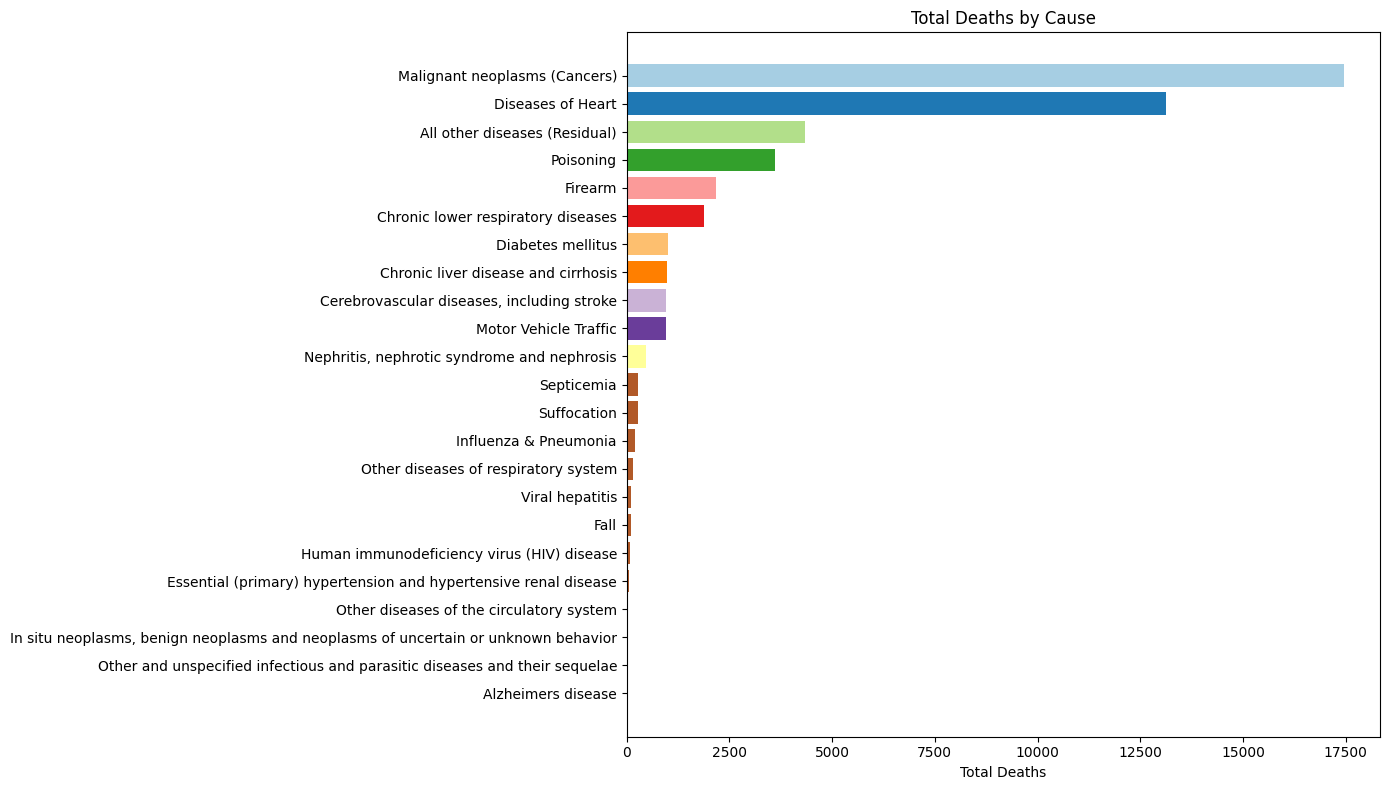

In [23]:
# Plotting the bar graph
plt.figure(figsize=(14, 8))
plt.barh(total_deaths_per_cause['Injury Mechanism & All Other Leading Causes'], total_deaths_per_cause['Total Deaths'],
         color=plt.cm.Paired(range(len(total_deaths_per_cause))))
plt.xlabel('Total Deaths')  # Set the x-axis label
plt.title('Total Deaths by Cause')  # Set the title of the plot
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



---


 Cancer has surpassed all other recorded causes of death to become the leading cause of death in all counties in Missouri. As a result, it is crucial to focus on cases where cancer is indicated as the reason of death, allowing for more targeted exploratory data analysis on this critical health issue.

In [24]:
# Filter rows where 'Injury Mechanism & All Other Leading Causes' contains 'Malignant neoplasms (Cancers)'
mortality_data = mortality_data[mortality_data['Injury Mechanism & All Other Leading Causes'].str.contains('Malignant neoplasms \(Cancers\)')].reset_index(drop=True)
mortality_data

,County,County Code,Injury Mechanism & All Other Leading Causes,Gender,Age Group,Race,Deaths,Population
0,"Adair County, MO",29001,Malignant neoplasms (Cancers),Female,45-54 years,White,11,6613
1,"Adair County, MO",29001,Malignant neoplasms (Cancers),Female,55-64 years,White,17,6506
2,"Adair County, MO",29001,Malignant neoplasms (Cancers),Male,55-64 years,White,30,6371
3,"Andrew County, MO",29003,Malignant neoplasms (Cancers),Female,45-54 years,White,10,6007
4,"Andrew County, MO",29003,Malignant neoplasms (Cancers),Female,55-64 years,White,23,6190
...,...,...,...,...,...,...,...,...
352,"St. Louis city, MO",29510,Malignant neoplasms (Cancers),Male,35-44 years,White,11,56292
353,"St. Louis city, MO",29510,Malignant neoplasms (Cancers),Male,45-54 years,Black or African American,83,46087
354,"St. Louis city, MO",29510,Malignant neoplasms (Cancers),Male,45-54 years,White,64,52092
355,"St. Louis city, MO",29510,Malignant neoplasms (Cancers),Male,55-64 years,Black or African American,273,42798


# **3. US County Level Mortality from 1980 to 2015**

---
The dataset presents a clear record of cancer mortality rates from 1980 to 2015 across the United States, broken down by county. It's laid out in a simple format that shows the number of deaths from cancer every five years, along with the change in death rates over the entire 35 years. This information is a key part of our project because it helps us see trends and changes in cancer deaths. Understanding these patterns can help us figure out better ways to fight cancer and improve health policies.

**Link to the dataset:-**

https://www.kaggle.com/datasets/IHME/us-countylevel-mortality/

In [25]:
# Load the data from amazon web service in the excel format
neoplasms_data = pd.read_excel('https://hdsfinalproject.s3.us-east-2.amazonaws.com/Neoplasms.xlsx', header = 1)
neoplasms_data.head()

,Location,FIPS,"Mortality Rate, 1980*","Mortality Rate, 1985*","Mortality Rate, 1990*","Mortality Rate, 1995*","Mortality Rate, 2000*","Mortality Rate, 2005*","Mortality Rate, 2010*","Mortality Rate, 2014*","% Change in Mortality Rate, 1980-2014"
0,United States,NaN,"240.24 (235.83, 244.11)","236.81 (231.71, 240.33)","232.19 (226.38, 235.35)","231.17 (225.03, 234.65)","217.78 (213.47, 220.99)","205.58 (202.48, 209.80)","192.95 (189.79, 197.76)","192.04 (188.60, 197.71)","-20.06 (-21.42, -18.22)"
1,Alabama,1.0,"252.60 (247.84, 256.84)","252.43 (246.90, 256.52)","253.15 (246.95, 257.16)","257.15 (250.27, 261.47)","248.60 (243.58, 252.77)","240.58 (236.52, 245.66)","229.62 (225.33, 235.35)","230.98 (226.51, 238.32)","-8.56 (-10.46, -6.08)"
2,"Autauga County, Alabama",1001.0,"262.28 (246.93, 277.87)","262.79 (246.90, 277.06)","264.27 (249.27, 278.67)","264.91 (250.51, 279.03)","252.92 (239.13, 266.49)","244.35 (231.02, 258.29)","229.79 (216.77, 242.74)","233.32 (219.21, 249.01)","-11.04 (-18.82, -3.02)"
3,"Baldwin County, Alabama",1003.0,"233.78 (222.15, 245.84)","228.16 (217.23, 239.30)","229.82 (218.42, 240.97)","233.49 (222.07, 244.64)","217.76 (208.41, 228.06)","206.61 (196.72, 216.76)","201.58 (192.41, 210.89)","200.69 (191.51, 209.99)","-14.16 (-19.57, -7.63)"
4,"Barbour County, Alabama",1005.0,"260.64 (244.52, 278.22)","266.48 (251.03, 281.48)","272.11 (256.97, 288.59)","278.99 (263.06, 294.28)","271.62 (256.84, 287.13)","262.79 (247.20, 279.51)","256.72 (239.70, 275.05)","260.26 (241.30, 279.76)","-0.14 (-9.61, 10.42)"


# **Exploratory Data Analysis and Data Cleaning**

---



In [26]:
# Check the shape of the dataset
neoplasms_data.shape

(3194, 11)

In [27]:
# Get the datatypes of all the varaibles
neoplasms_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3194 entries, 0 to 3193
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Location                               3194 non-null   object 
 1   FIPS                                   3193 non-null   float64
 2   Mortality Rate, 1980*                  3194 non-null   object 
 3   Mortality Rate, 1985*                  3194 non-null   object 
 4   Mortality Rate, 1990*                  3194 non-null   object 
 5   Mortality Rate, 1995*                  3194 non-null   object 
 6   Mortality Rate, 2000*                  3194 non-null   object 
 7   Mortality Rate, 2005*                  3194 non-null   object 
 8   Mortality Rate, 2010*                  3194 non-null   object 
 9   Mortality Rate, 2014*                  3194 non-null   object 
 10  % Change in Mortality Rate, 1980-2014  3194 non-null   object 
dtypes: f

In [28]:
# Rename the columns by removing the asterisk and replacing the comma with 'in'
neoplasms_data.columns = neoplasms_data.columns.str.replace(r',\s+', ' in ', regex=True).str.replace(r'\*', '', regex=True)
neoplasms_data.head()

,Location,FIPS,Mortality Rate in 1980,Mortality Rate in 1985,Mortality Rate in 1990,Mortality Rate in 1995,Mortality Rate in 2000,Mortality Rate in 2005,Mortality Rate in 2010,Mortality Rate in 2014,% Change in Mortality Rate in 1980-2014
0,United States,NaN,"240.24 (235.83, 244.11)","236.81 (231.71, 240.33)","232.19 (226.38, 235.35)","231.17 (225.03, 234.65)","217.78 (213.47, 220.99)","205.58 (202.48, 209.80)","192.95 (189.79, 197.76)","192.04 (188.60, 197.71)","-20.06 (-21.42, -18.22)"
1,Alabama,1.0,"252.60 (247.84, 256.84)","252.43 (246.90, 256.52)","253.15 (246.95, 257.16)","257.15 (250.27, 261.47)","248.60 (243.58, 252.77)","240.58 (236.52, 245.66)","229.62 (225.33, 235.35)","230.98 (226.51, 238.32)","-8.56 (-10.46, -6.08)"
2,"Autauga County, Alabama",1001.0,"262.28 (246.93, 277.87)","262.79 (246.90, 277.06)","264.27 (249.27, 278.67)","264.91 (250.51, 279.03)","252.92 (239.13, 266.49)","244.35 (231.02, 258.29)","229.79 (216.77, 242.74)","233.32 (219.21, 249.01)","-11.04 (-18.82, -3.02)"
3,"Baldwin County, Alabama",1003.0,"233.78 (222.15, 245.84)","228.16 (217.23, 239.30)","229.82 (218.42, 240.97)","233.49 (222.07, 244.64)","217.76 (208.41, 228.06)","206.61 (196.72, 216.76)","201.58 (192.41, 210.89)","200.69 (191.51, 209.99)","-14.16 (-19.57, -7.63)"
4,"Barbour County, Alabama",1005.0,"260.64 (244.52, 278.22)","266.48 (251.03, 281.48)","272.11 (256.97, 288.59)","278.99 (263.06, 294.28)","271.62 (256.84, 287.13)","262.79 (247.20, 279.51)","256.72 (239.70, 275.05)","260.26 (241.30, 279.76)","-0.14 (-9.61, 10.42)"


In [29]:
# Change the data types of the varaibles Mortality Rate from object to float
mortality_columns = [col for col in neoplasms_data.columns if 'Mortality Rate in' in col]

for col in mortality_columns:
# Extract the numeric rate before the parentheses and convert to float
    neoplasms_data[col] = neoplasms_data[col].astype(str).str.extract(r'^([\d.]+)').astype(float)
neoplasms_data.head()

,Location,FIPS,Mortality Rate in 1980,Mortality Rate in 1985,Mortality Rate in 1990,Mortality Rate in 1995,Mortality Rate in 2000,Mortality Rate in 2005,Mortality Rate in 2010,Mortality Rate in 2014,% Change in Mortality Rate in 1980-2014
0,United States,NaN,240.24,236.81,232.19,231.17,217.78,205.58,192.95,192.04,NaN
1,Alabama,1.0,252.60,252.43,253.15,257.15,248.60,240.58,229.62,230.98,NaN
2,"Autauga County, Alabama",1001.0,262.28,262.79,264.27,264.91,252.92,244.35,229.79,233.32,NaN
3,"Baldwin County, Alabama",1003.0,233.78,228.16,229.82,233.49,217.76,206.61,201.58,200.69,NaN
4,"Barbour County, Alabama",1005.0,260.64,266.48,272.11,278.99,271.62,262.79,256.72,260.26,NaN


In [30]:
# Check the datatypes of all the converted varaibles
neoplasms_data.dtypes

Location                                    object
FIPS                                       float64
Mortality Rate in 1980                     float64
Mortality Rate in 1985                     float64
Mortality Rate in 1990                     float64
Mortality Rate in 1995                     float64
Mortality Rate in 2000                     float64
Mortality Rate in 2005                     float64
Mortality Rate in 2010                     float64
Mortality Rate in 2014                     float64
% Change in Mortality Rate in 1980-2014    float64
dtype: object

In [31]:
# Filter out the data which has only Missouri as the state and all its counties
missouri_data = neoplasms_data[neoplasms_data['Location'].str.contains("Missouri")].reset_index(drop=True)
missouri_data.head()

,Location,FIPS,Mortality Rate in 1980,Mortality Rate in 1985,Mortality Rate in 1990,Mortality Rate in 1995,Mortality Rate in 2000,Mortality Rate in 2005,Mortality Rate in 2010,Mortality Rate in 2014,% Change in Mortality Rate in 1980-2014
0,Missouri,29.0,244.27,242.32,238.34,240.86,228.10,217.77,206.58,207.78,NaN
1,"Adair County, Missouri",29001.0,215.54,220.48,223.49,230.78,227.24,225.81,216.07,222.50,3.23
2,"Andrew County, Missouri",29003.0,207.15,208.06,208.88,212.70,207.63,200.72,190.58,193.69,NaN
3,"Atchison County, Missouri",29005.0,202.85,207.23,210.81,216.52,212.11,205.16,199.11,202.11,NaN
4,"Audrain County, Missouri",29007.0,216.97,222.44,227.03,233.02,225.64,223.28,217.34,218.39,0.65


In [32]:
# Shape of the dataset after filtering
missouri_data.shape

(116, 11)

# **# Merging the datasets 'mortality_data' with 'missouri_data' on FIPS Code**

---



In [33]:
# Perform the left join between two datasets on FIPS Code
merged_data = pd.merge(mortality_data, missouri_data, left_on='County Code', right_on='FIPS')
merged_data.head()

,County,County Code,Injury Mechanism & All Other Leading Causes,Gender,Age Group,Race,Deaths,Population,Location,FIPS,Mortality Rate in 1980,Mortality Rate in 1985,Mortality Rate in 1990,Mortality Rate in 1995,Mortality Rate in 2000,Mortality Rate in 2005,Mortality Rate in 2010,Mortality Rate in 2014,% Change in Mortality Rate in 1980-2014
0,"Adair County, MO",29001,Malignant neoplasms (Cancers),Female,45-54 years,White,11,6613,"Adair County, Missouri",29001.0,215.54,220.48,223.49,230.78,227.24,225.81,216.07,222.50,3.23
1,"Adair County, MO",29001,Malignant neoplasms (Cancers),Female,55-64 years,White,17,6506,"Adair County, Missouri",29001.0,215.54,220.48,223.49,230.78,227.24,225.81,216.07,222.50,3.23
2,"Adair County, MO",29001,Malignant neoplasms (Cancers),Male,55-64 years,White,30,6371,"Adair County, Missouri",29001.0,215.54,220.48,223.49,230.78,227.24,225.81,216.07,222.50,3.23
3,"Andrew County, MO",29003,Malignant neoplasms (Cancers),Female,45-54 years,White,10,6007,"Andrew County, Missouri",29003.0,207.15,208.06,208.88,212.70,207.63,200.72,190.58,193.69,NaN
4,"Andrew County, MO",29003,Malignant neoplasms (Cancers),Female,55-64 years,White,23,6190,"Andrew County, Missouri",29003.0,207.15,208.06,208.88,212.70,207.63,200.72,190.58,193.69,NaN


In [34]:
# Drop the unrequired columns from the merged data
merged_data.drop(columns=['County Code', 'FIPS','Location','% Change in Mortality Rate in 1980-2014'], inplace=True)
merged_data.head()

,County,Injury Mechanism & All Other Leading Causes,Gender,Age Group,Race,Deaths,Population,Mortality Rate in 1980,Mortality Rate in 1985,Mortality Rate in 1990,Mortality Rate in 1995,Mortality Rate in 2000,Mortality Rate in 2005,Mortality Rate in 2010,Mortality Rate in 2014
0,"Adair County, MO",Malignant neoplasms (Cancers),Female,45-54 years,White,11,6613,215.54,220.48,223.49,230.78,227.24,225.81,216.07,222.50
1,"Adair County, MO",Malignant neoplasms (Cancers),Female,55-64 years,White,17,6506,215.54,220.48,223.49,230.78,227.24,225.81,216.07,222.50
2,"Adair County, MO",Malignant neoplasms (Cancers),Male,55-64 years,White,30,6371,215.54,220.48,223.49,230.78,227.24,225.81,216.07,222.50
3,"Andrew County, MO",Malignant neoplasms (Cancers),Female,45-54 years,White,10,6007,207.15,208.06,208.88,212.70,207.63,200.72,190.58,193.69
4,"Andrew County, MO",Malignant neoplasms (Cancers),Female,55-64 years,White,23,6190,207.15,208.06,208.88,212.70,207.63,200.72,190.58,193.69


In [35]:
# Calculate the percent change in mortality rate from 1980 to 2014
merged_data['Percent Change in Mortality'] = ((merged_data['Mortality Rate in 2014'] - merged_data['Mortality Rate in 1980']) / merged_data['Mortality Rate in 1980']) * 100

# View the DataFrame with the new calculated field
merged_data.head()

,County,Injury Mechanism & All Other Leading Causes,Gender,Age Group,Race,Deaths,Population,Mortality Rate in 1980,Mortality Rate in 1985,Mortality Rate in 1990,Mortality Rate in 1995,Mortality Rate in 2000,Mortality Rate in 2005,Mortality Rate in 2010,Mortality Rate in 2014,Percent Change in Mortality
0,"Adair County, MO",Malignant neoplasms (Cancers),Female,45-54 years,White,11,6613,215.54,220.48,223.49,230.78,227.24,225.81,216.07,222.50,3.229099
1,"Adair County, MO",Malignant neoplasms (Cancers),Female,55-64 years,White,17,6506,215.54,220.48,223.49,230.78,227.24,225.81,216.07,222.50,3.229099
2,"Adair County, MO",Malignant neoplasms (Cancers),Male,55-64 years,White,30,6371,215.54,220.48,223.49,230.78,227.24,225.81,216.07,222.50,3.229099
3,"Andrew County, MO",Malignant neoplasms (Cancers),Female,45-54 years,White,10,6007,207.15,208.06,208.88,212.70,207.63,200.72,190.58,193.69,-6.497707
4,"Andrew County, MO",Malignant neoplasms (Cancers),Female,55-64 years,White,23,6190,207.15,208.06,208.88,212.70,207.63,200.72,190.58,193.69,-6.497707


In [36]:
# Statistical overview of the merged data
merged_data.describe()

,Deaths,Population,Mortality Rate in 1980,Mortality Rate in 1985,Mortality Rate in 1990,Mortality Rate in 1995,Mortality Rate in 2000,Mortality Rate in 2005,Mortality Rate in 2010,Mortality Rate in 2014,Percent Change in Mortality
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,48.918768,28829.971989,237.228543,237.866891,237.503810,242.443417,232.915014,224.702101,214.749384,217.262885,-8.227701
std,80.807801,45466.048460,20.923747,20.701001,20.429618,21.610948,20.554770,21.620272,21.860827,23.706987,8.419507
min,10.000000,1327.000000,196.280000,200.660000,201.680000,202.910000,196.290000,185.500000,176.390000,174.350000,-22.881181
25%,14.000000,5854.000000,220.930000,223.390000,223.810000,226.240000,216.510000,208.560000,198.130000,198.830000,-16.261564
50%,23.000000,10976.000000,235.730000,236.500000,235.610000,240.950000,232.370000,223.730000,211.340000,215.610000,-6.947408
75%,43.000000,29841.000000,247.330000,249.120000,248.180000,254.020000,246.450000,240.880000,230.950000,236.550000,-2.542049
max,698.000000,281073.000000,307.910000,306.990000,300.350000,300.250000,284.130000,280.460000,273.580000,284.140000,9.739039


In [37]:
# Shape of the merged dataset
merged_data.shape

(357, 16)

In [38]:
# Check the data types of all the variables in the merged dataset
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 0 to 356
Data columns (total 16 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   County                                       357 non-null    object 
 1   Injury Mechanism & All Other Leading Causes  357 non-null    object 
 2   Gender                                       357 non-null    object 
 3   Age Group                                    357 non-null    object 
 4   Race                                         357 non-null    object 
 5   Deaths                                       357 non-null    int64  
 6   Population                                   357 non-null    int64  
 7   Mortality Rate in 1980                       357 non-null    float64
 8   Mortality Rate in 1985                       357 non-null    float64
 9   Mortality Rate in 1990                       357 non-null    float64
 10  Mo

In [39]:
# Change all column names to Upper Case
merged_data.columns = [col.upper() for col in merged_data.columns]
merged_data.head()

,COUNTY,INJURY MECHANISM & ALL OTHER LEADING CAUSES,GENDER,AGE GROUP,RACE,DEATHS,POPULATION,MORTALITY RATE IN 1980,MORTALITY RATE IN 1985,MORTALITY RATE IN 1990,MORTALITY RATE IN 1995,MORTALITY RATE IN 2000,MORTALITY RATE IN 2005,MORTALITY RATE IN 2010,MORTALITY RATE IN 2014,PERCENT CHANGE IN MORTALITY
0,"Adair County, MO",Malignant neoplasms (Cancers),Female,45-54 years,White,11,6613,215.54,220.48,223.49,230.78,227.24,225.81,216.07,222.50,3.229099
1,"Adair County, MO",Malignant neoplasms (Cancers),Female,55-64 years,White,17,6506,215.54,220.48,223.49,230.78,227.24,225.81,216.07,222.50,3.229099
2,"Adair County, MO",Malignant neoplasms (Cancers),Male,55-64 years,White,30,6371,215.54,220.48,223.49,230.78,227.24,225.81,216.07,222.50,3.229099
3,"Andrew County, MO",Malignant neoplasms (Cancers),Female,45-54 years,White,10,6007,207.15,208.06,208.88,212.70,207.63,200.72,190.58,193.69,-6.497707
4,"Andrew County, MO",Malignant neoplasms (Cancers),Female,55-64 years,White,23,6190,207.15,208.06,208.88,212.70,207.63,200.72,190.58,193.69,-6.497707


# **Data Visualizations**

---



### **Second Visualization:-**

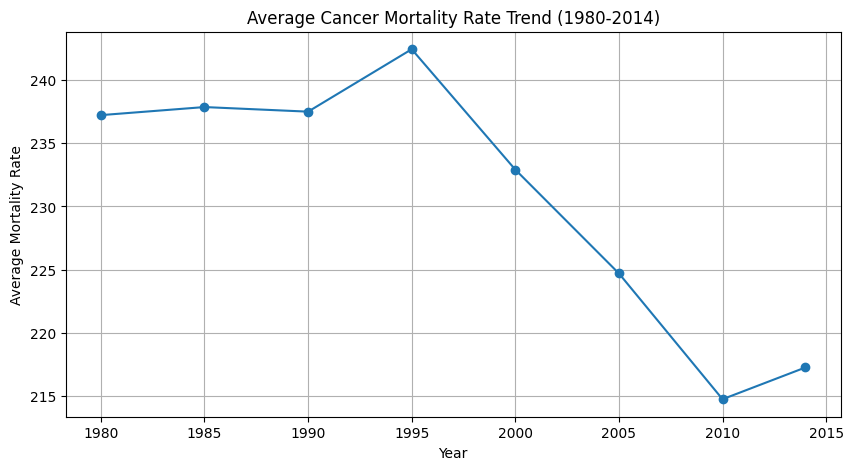

In [40]:
# Extract the years from the column names
years = [1980, 1985, 1990, 1995, 2000, 2005, 2010, 2014]

# Calculate the mean mortality rate for each year
average_mortality_rates = {year: merged_data[f'MORTALITY RATE IN {year}'].mean() for year in years}

# Plot the average mortality rate over time
plt.figure(figsize=(10, 5))
plt.plot(list(average_mortality_rates.keys()), list(average_mortality_rates.values()), marker='o')
plt.title('Average Cancer Mortality Rate Trend (1980-2014)')
plt.xlabel('Year')
plt.ylabel('Average Mortality Rate')
plt.grid(True)
plt.show()


From 1980 to around the mid-1990s, the average cancer mortality rate exhibits some fluctuations but remains relatively stable, hovering around the 235 to 240 per 100,000 people range. There is a notable peak in the average mortality rate around 1990, after which the rate decreases slightly but then stabilizes for a short period. Post-1995, there is a marked downward trend in the average mortality rate, indicating a significant reduction in cancer-related deaths. The decrease in mortality rate becomes more pronounced after 2000, continuing to decline steeply through 2010. By 2014, the average cancer mortality rate has decreased substantially compared to 1980, with the rate appearing to level off slightly in the last few years of the dataset.



In [41]:
# Pivot the DataFrame to get the average mortality rate by age group for each year
pivot_df = merged_data.pivot_table(
    values=[f'MORTALITY RATE IN {year}' for year in range(1980, 2015, 5)],
    index='AGE GROUP',
    aggfunc='mean'
)
pivot_df

,MORTALITY RATE IN 1980,MORTALITY RATE IN 1985,MORTALITY RATE IN 1990,MORTALITY RATE IN 1995,MORTALITY RATE IN 2000,MORTALITY RATE IN 2005,MORTALITY RATE IN 2010
AGE GROUP,,,,,,,
25-34 years,254.223750,249.998750,243.672500,245.476250,228.650000,216.468750,203.253750
35-44 years,250.172000,248.988800,245.238800,247.518400,232.864400,221.591200,209.268800
45-54 years,238.557478,239.206870,238.924783,243.824087,234.212783,226.168000,215.946348
55-64 years,234.298517,235.334833,235.560574,240.960574,232.370239,224.582775,215.186364


## **Third Visualization:-**

---



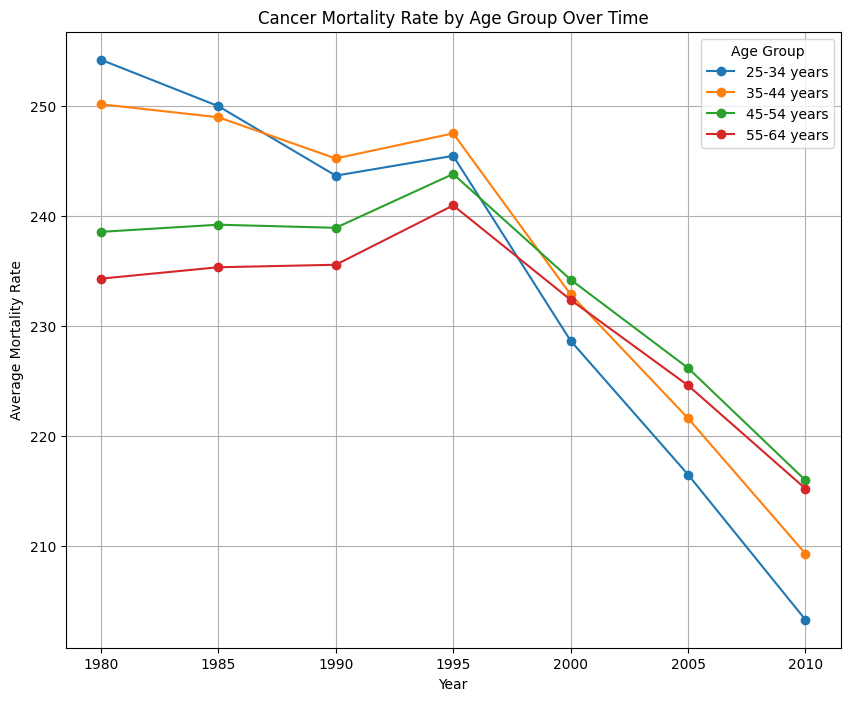

In [42]:
# Melt the DataFrame so each row corresponds to a single year-age group combination
melted_df = merged_data.melt(id_vars=['COUNTY', 'INJURY MECHANISM & ALL OTHER LEADING CAUSES', 'GENDER', 'AGE GROUP', 'RACE', 'DEATHS', 'POPULATION'],
                    value_vars=[f'MORTALITY RATE IN {year}' for year in range(1980, 2014, 5)],
                    var_name='Year', value_name='Mortality_Rate')

# Convert 'Year' into a numerical value for grouping
melted_df['Year'] = melted_df['Year'].str.extract('(\d{4})').astype(int)

# Group by 'Age Group' and 'Year' and calculate the mean mortality rate
age_group_yearly_mortality = melted_df.groupby(['AGE GROUP', 'Year'])['Mortality_Rate'].mean().reset_index()

# Pivot the data to have years as columns and age groups as rows
pivot_df = age_group_yearly_mortality.pivot(index='AGE GROUP', columns='Year', values='Mortality_Rate')

# Plot the results
pivot_df.T.plot(kind='line', figsize=(10, 8), marker='o')
plt.title('Cancer Mortality Rate by Age Group Over Time')
plt.xlabel('Year')
plt.ylabel('Average Mortality Rate')
plt.legend(title='Age Group')
plt.grid(True)
plt.show()

The 25-34 years age group starts with the highest mortality rate in 1980 and shows a gradual decline throughout the period, ending with the lowest rate among all age groups in 2010.

The 35-44 years age group also begins with a high rate, sees a slight increase by 1985, but then follows a similar downward trend to the 25-34 age group.

The 45-54 and 55-64 years age groups start with lower mortality rates compared to the younger age groups. They experience a slight increase until about 1995, after which they too show a consistent decline.

Notably, by 2010, all age groups converge to a narrow range of mortality rates, suggest that the disparities between age groups in cancer mortality have decreased.

The significant reduction in mortality rates across all age groups indicate improvements in cancer treatments, early detection, and prevention efforts becoming more effective over the three decades.


In [43]:
# Define the years as a list for easier management
years = [str(year) for year in range(1980, 2015, 5)]

# Create a pivot table with 'County' as the index and years as the columns
pivot_table = merged_data.pivot_table(
    values=[f'MORTALITY RATE IN {year}' for year in years],
    index='COUNTY',
    aggfunc='mean'
)
pivot_table.head()

,MORTALITY RATE IN 1980,MORTALITY RATE IN 1985,MORTALITY RATE IN 1990,MORTALITY RATE IN 1995,MORTALITY RATE IN 2000,MORTALITY RATE IN 2005,MORTALITY RATE IN 2010
COUNTY,,,,,,,
"Adair County, MO",215.54,220.48,223.49,230.78,227.24,225.81,216.07
"Andrew County, MO",207.15,208.06,208.88,212.70,207.63,200.72,190.58
"Audrain County, MO",216.97,222.44,227.03,233.02,225.64,223.28,217.34
"Barry County, MO",226.57,223.92,221.95,227.54,217.41,209.03,198.13
"Barton County, MO",210.87,212.34,214.78,219.43,212.01,202.14,193.00




---


The dataframe shows average mortality rates for each county, giving an overview of death tolls in specific areas. This data pinpoints which counties have the largest number of deaths, directing healthcare groups and government agencies to focus their efforts in these areas. Understanding where deaths are most common allows for the development and implementation of suitable policies and health treatments to address these key issues.



In [44]:
# Define the years as a list for easier management
years_columns = [f'MORTALITY RATE IN {year}' for year in range(1980, 2015, 5)]

# Calculate the mean mortality rate across all years for each county
merged_data['Average Mortality Rate'] = merged_data[years_columns].mean(axis=1)

# Now group by 'County' and calculate the mean of these average mortality rates
county_average_mortality = merged_data.groupby('COUNTY')['Average Mortality Rate'].mean().sort_values(ascending=False).reset_index()

# Rename the columns
county_average_mortality.columns = ['COUNTY', 'AVERAGE MORTALITY RATE']
county_average_mortality.head()

,COUNTY,AVERAGE MORTALITY RATE
0,"St. Louis city, MO",285.140000
1,"Dunklin County, MO",276.601429
2,"Pemiscot County, MO",271.630000
3,"Mississippi County, MO",269.488571
4,"Carter County, MO",266.077143


### **Fourth Visualization:-**

---



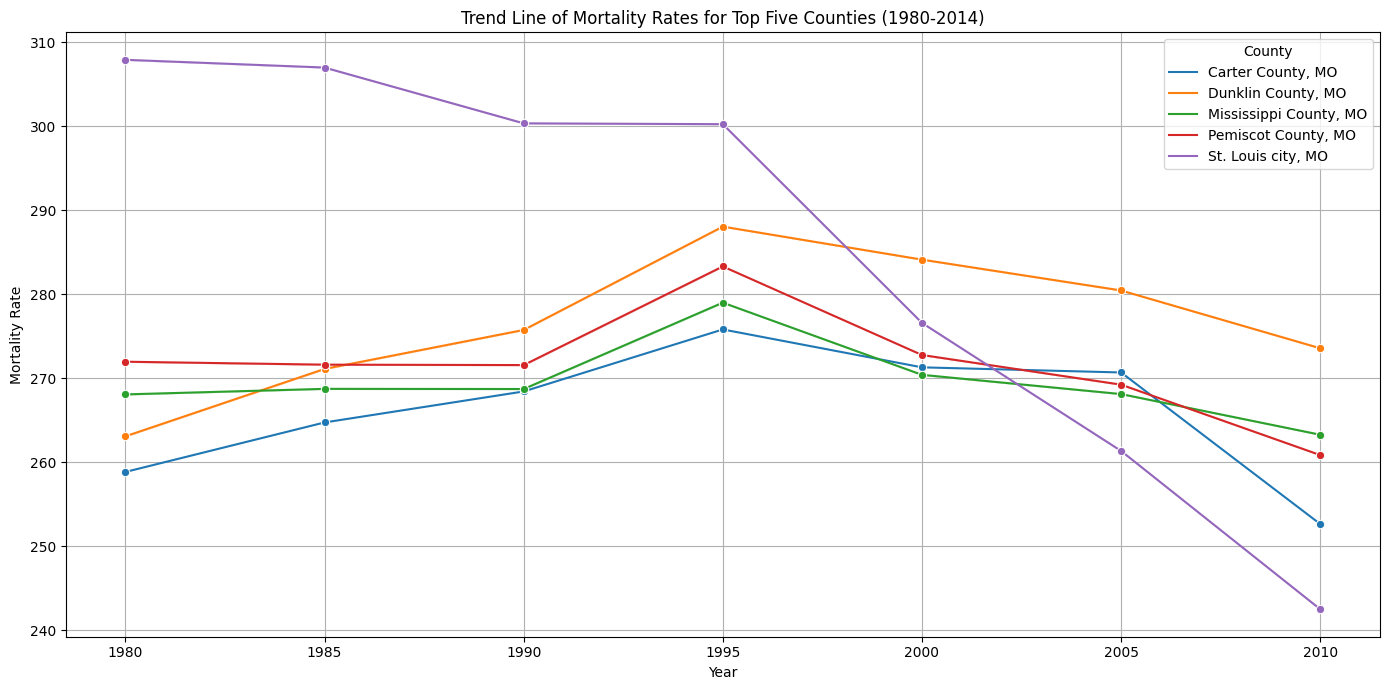

In [45]:
# Get the top five counties by average mortality rate
top_five_counties = county_average_mortality.head(5)['COUNTY']

# Filter the merged_data to only include the top five counties
top_counties_data = merged_data[merged_data['COUNTY'].isin(top_five_counties)]

# Melt the DataFrame to have one row per year per county
melted_data = pd.melt(top_counties_data, id_vars=['COUNTY'], value_vars=[f'MORTALITY RATE IN {year}' for year in range(1980, 2015, 5)],
                      var_name='Year', value_name='Mortality_Rate')

# Convert 'Year' into a numerical value for plotting
melted_data['Year'] = melted_data['Year'].str.extract('(\d{4})').astype(int)

# Plot the trend lines
plt.figure(figsize=(14, 7))
sns.lineplot(data=melted_data, x='Year', y='Mortality_Rate', hue='COUNTY', marker='o')
plt.title('Trend Line of Mortality Rates for Top Five Counties (1980-2014)')
plt.xlabel('Year')
plt.ylabel('Mortality Rate')
plt.legend(title='County', loc='upper right')
plt.grid(True)
plt.tight_layout()  # Adjust the layout to ensure all labels and titles are visible
plt.show()


In 1980, St. Louis City, MO (purple line) has the highest mortality rate. It maintains a greater pace than the other counties until around 2000, when it begins to fall precipitously. It still has one of the highest rates among the five counties in 2014, but it has fallen dramatically from its starting point.

Carter County, Missouri (blue line) shows a progressive increase in mortality until around 1995, when it begins to plummet. By the conclusion of the era, Carter County's mortality rate had decreased significantly but remained in the middle of the counties.

Dunklin County, Missouri (orange line), Mississippi County, Missouri (green line), and Pemiscot County, Missouri (red line) all have lower death rates than St. Louis city. Each shows an increase until the mid-1990s, then a drop. Their death rates have converged to comparable levels by 2014, much lower than their peaks around 1995.

The overall trend for all counties is an increase in death rates until the mid-1990s, followed by a significant reduction until 2014. This shows that health outcomes in the counties have generally improved, maybe as a result of breakthroughs in healthcare, preventive measures, or other public health efforts.



---



## **Fifth Visualization:-**

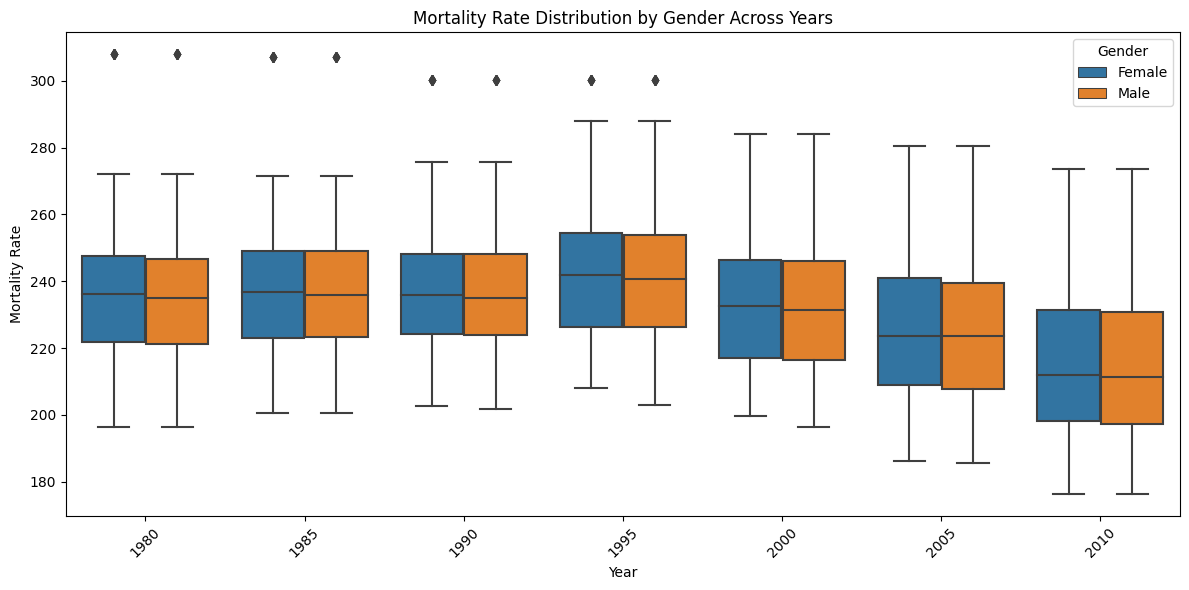

In [46]:
# Melt the DataFrame to get a long format DataFrame
melted_df = merged_data.melt(id_vars=['COUNTY', 'INJURY MECHANISM & ALL OTHER LEADING CAUSES', 'GENDER', 'AGE GROUP', 'RACE', 'DEATHS', 'POPULATION'],
                    value_vars=[f'MORTALITY RATE IN {year}' for year in range(1980, 2015, 5)],
                    var_name='Year', value_name='Mortality_Rate')

# Convert 'Year' to numerical and 'Gender' to category if not already
melted_df['Year'] = melted_df['Year'].str.extract('(\d{4})').astype(int)
melted_df['GENDER'] = melted_df['GENDER'].astype('category')

# Now create a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_df, x='Year', y='Mortality_Rate', hue='GENDER')
plt.title('Mortality Rate Distribution by Gender Across Years')
plt.xlabel('Year')
plt.ylabel('Mortality Rate')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The provided boxplots illustrate the distribution of mortality rates by gender across various years, from 1980 to 2010. A consistent trend observed is the relative stability in the median mortality rates for both genders over the 30-year span, with a slight downward trend becoming apparent in 2010. The interquartile ranges are fairly stable, indicating that the middle 50% of values have not experienced significant variability in spread across the years. Notably, there are fewer outliers in the later years, particularly in the 2000s, suggesting a potential reduction in extreme mortality rates as time progresses. While there appears to be a year (2000) where the median mortality rate for males slightly exceeds that of females, the overall data does not indicate a substantial disparity between genders. The trends suggest a gradual improvement in mortality rates, and the comparative gender analysis implies that the rates for males and females have followed similar trajectories over the period analyzed.

---



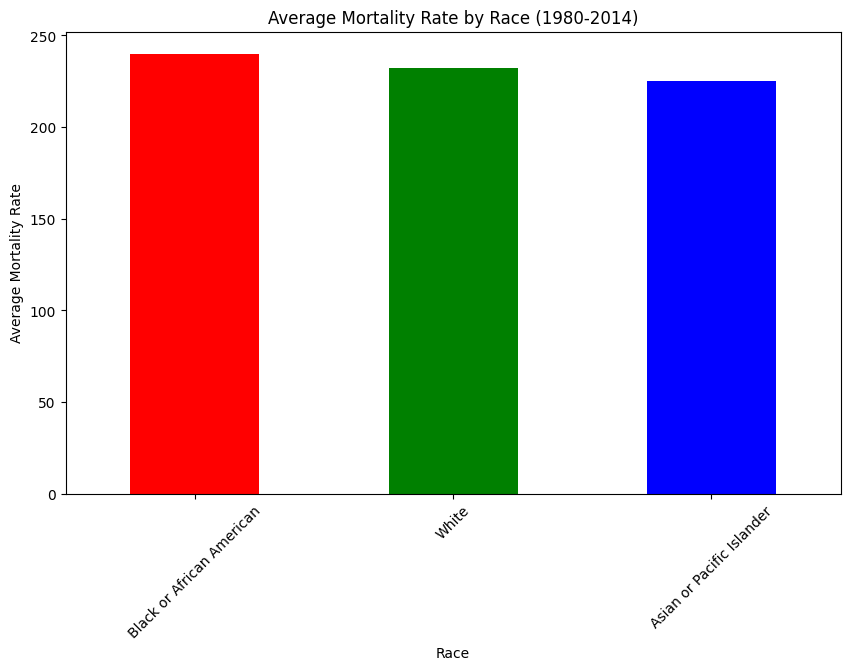

In [47]:
# Melt the DataFrame to get a long format DataFrame
years = [str(year) for year in range(1980, 2015, 5)]
melted_df = merged_data.melt(id_vars=['COUNTY', 'INJURY MECHANISM & ALL OTHER LEADING CAUSES', 'GENDER', 'AGE GROUP', 'RACE', 'DEATHS', 'POPULATION'],
                    value_vars=[f'MORTALITY RATE IN {year}' for year in years],
                    var_name='Year', value_name='Mortality_Rate')

# Group by 'Race' and calculate the mean mortality rate across all years
average_mortality_by_race = melted_df.groupby('RACE')['Mortality_Rate'].mean().sort_values(ascending=False)
colors = ['red', 'green', 'blue']
# Plot the average mortality rates by race
average_mortality_by_race.plot(kind='bar', color = colors, figsize=(10, 6))
plt.title('Average Mortality Rate by Race (1980-2014)')
plt.xlabel('Race')
plt.ylabel('Average Mortality Rate')
plt.xticks(rotation=45)
plt.show()



The bar chart visualizes the average mortality rate by race for the years 1980 to 2014. Each bar represents a different racial group, with the height corresponding to the average mortality rate calculated over the entire time period. The colors red, green, and blue are used to distinguish between the three racial groups: Black or African American, White, and Asian or Pacific Islander, respectively.

From the chart, it is apparent that there is a significant disparity in the average mortality rates among the racial groups. The Black or African American group has the highest average mortality rate, followed by the White group, and then the Asian or Pacific Islander group, which has the lowest average mortality rate among the three. This suggests that during the time frame from 1980 to 2014, the Black or African American population experienced higher mortality rates compared to the White and Asian or Pacific Islander populations.

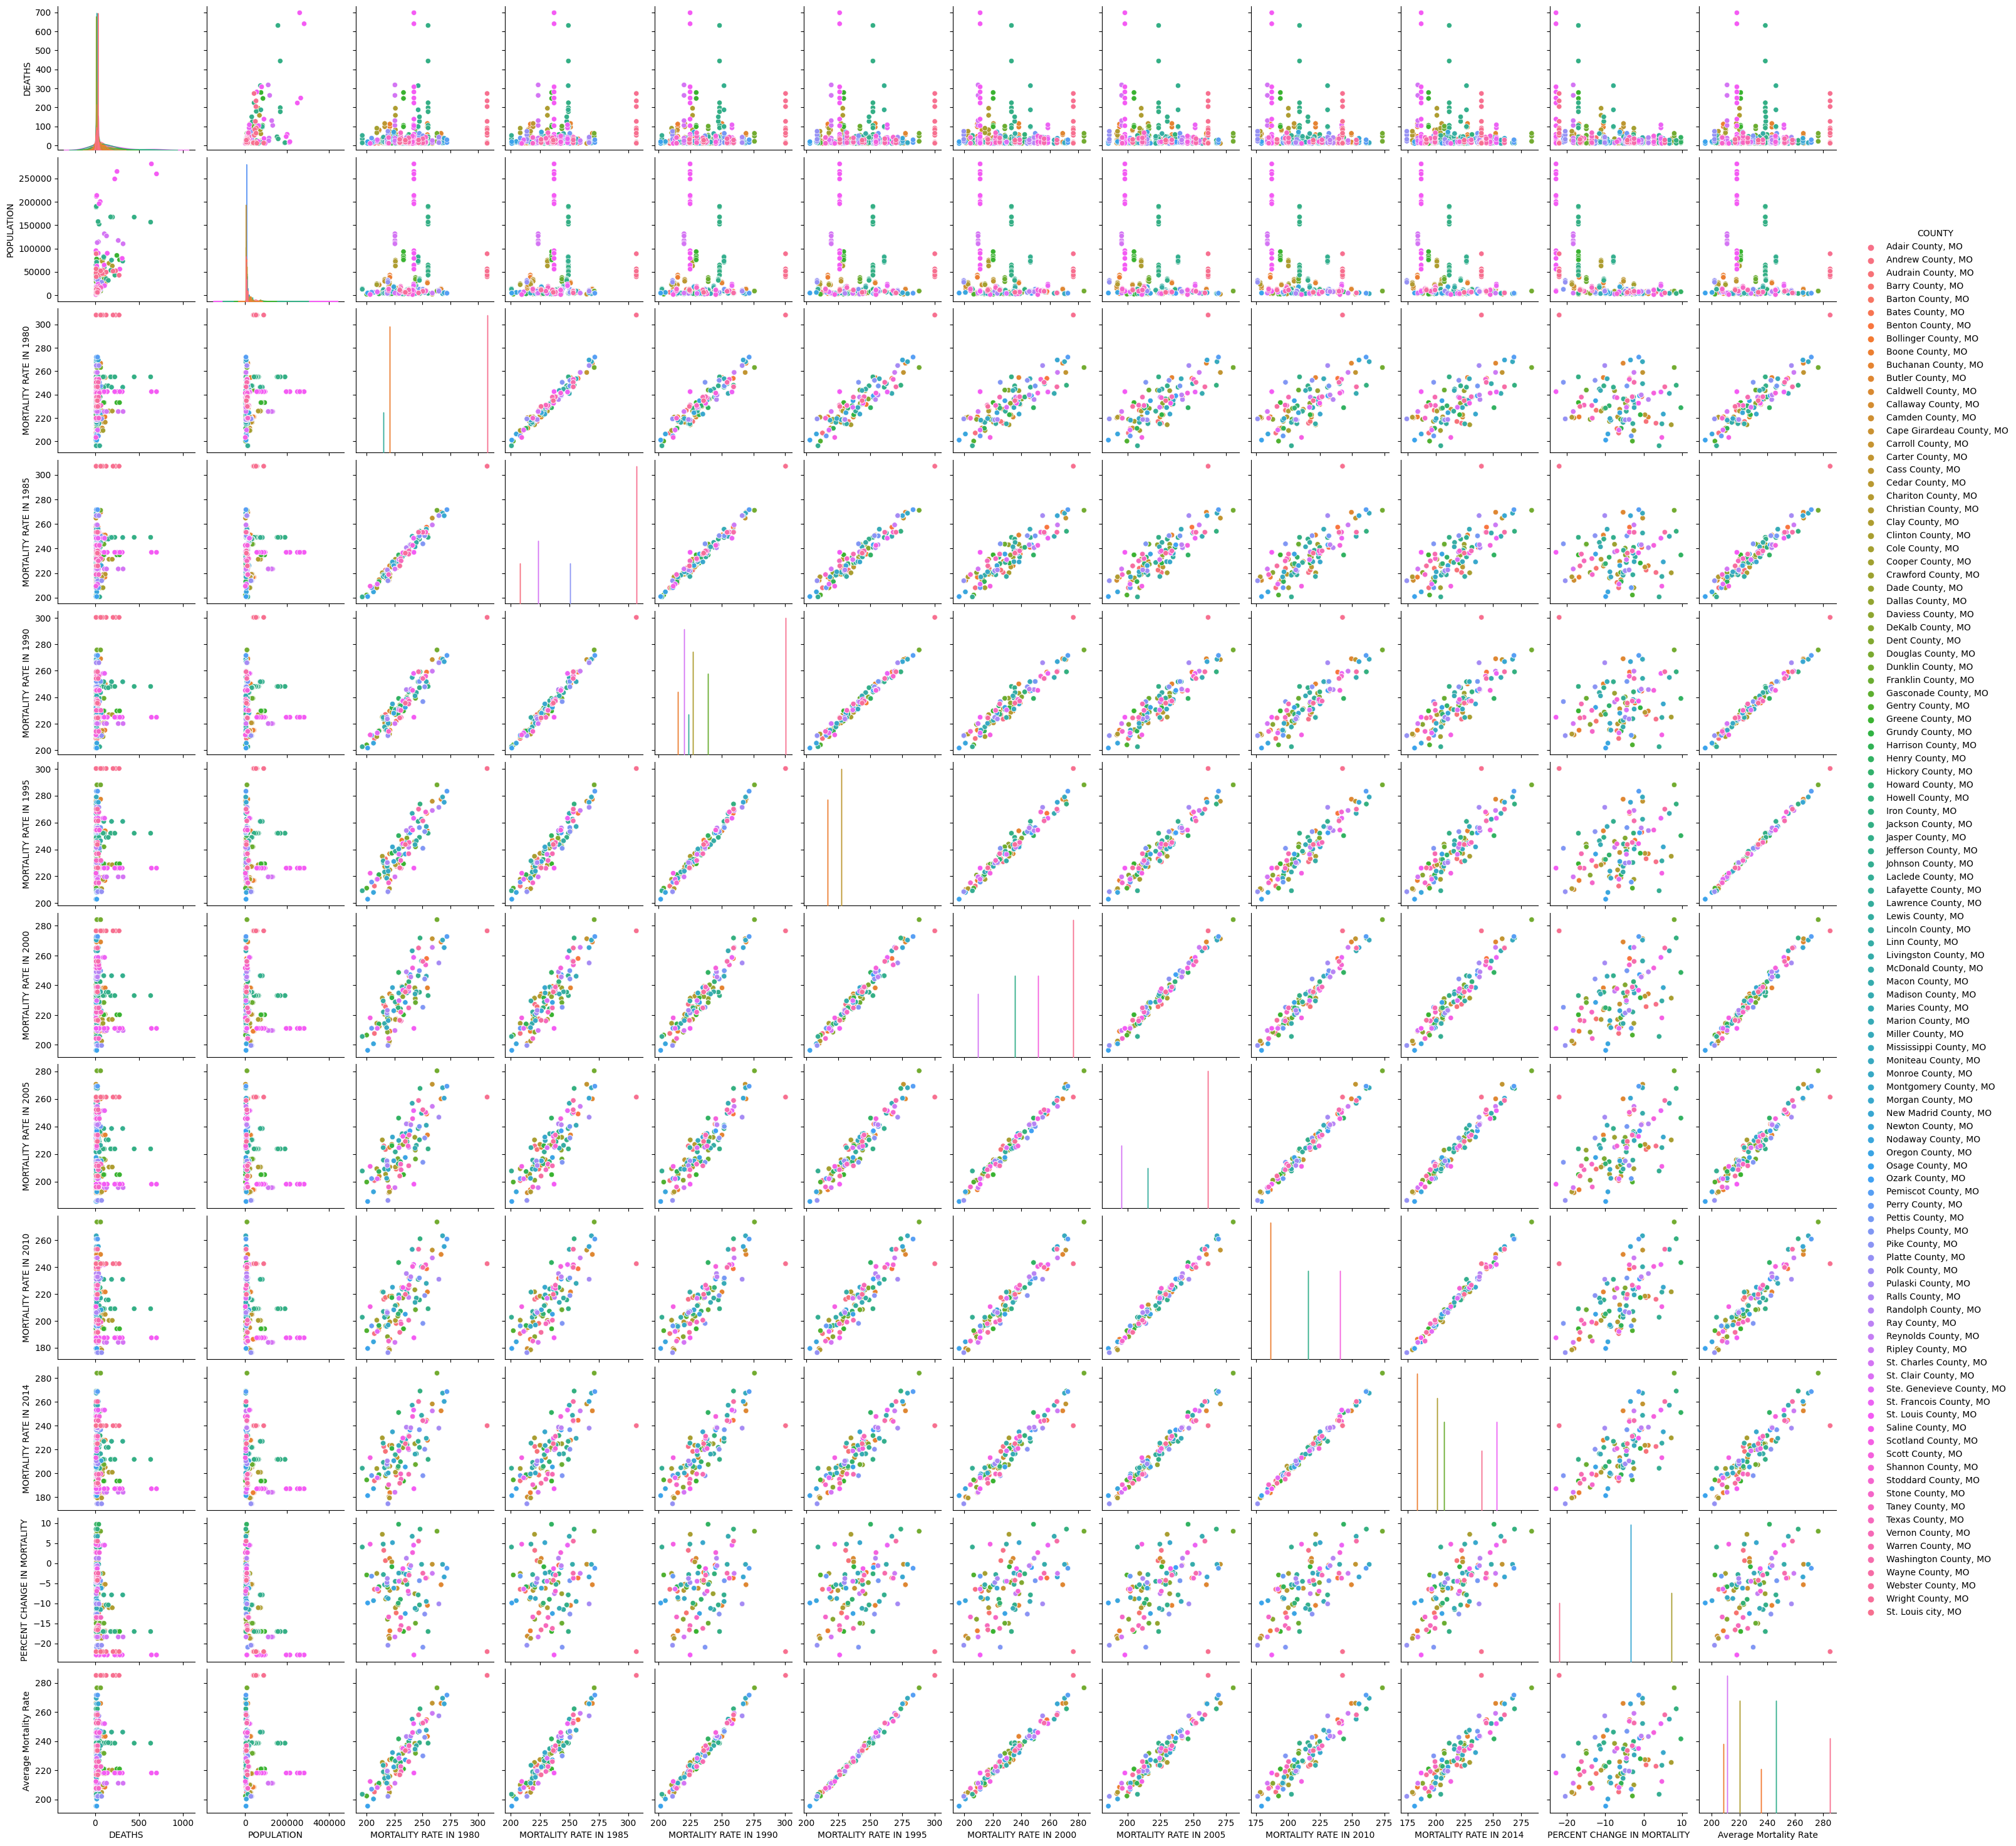

In [48]:
sns.pairplot(data = merged_data, hue = 'COUNTY')

### **Conclusion:-**
The analysis conducted thus far indicates a marked decline in cancer-related mortality starting from the year 1995. This trend can be attributed to significant medical advancements, particularly the cloning of the tumor suppressor gene BRCA1. This breakthrough, which occurred in 1994, has been pivotal in understanding the increased risks of breast and ovarian cancer associated with specific inherited mutations of the BRCA1 gene in women, as well as higher risks of various cancers in both genders. Following closely in 1995, the cloning of another gene, BRCA2, furthered this progress. Mutations in BRCA2 similarly heighten the risk of breast and ovarian cancers in women and have been linked to increased risks of several additional cancers in both sexes. The cloning of these genes has been instrumental in the reduction of cancer fatalities from 1995 to 2015, illustrating the impact of genetic research on improving cancer prognoses.

 These advancements have enhanced our understanding of cancer risks and have been crucial in reducing deaths. However, it's important to note that the annual number of people dying from cancer remains high. This underscores the need for ongoing medical advancements, the implementation of robust health policies, and targeted attention to regions with higher mortality rates. Continued efforts in these areas are essential to sustain and accelerate the progress in cancer treatment and prevention.

**Link:-**

https://www.cancer.gov/research/progress/250-years-milestones#:~:text=1995%3A%20BRCA2%20Tumor%20Suppressor%20Gene,in%20both%20men%20and%20women